## Bloby's performance after thresholding intensity between noise and signal

Bloby uses GMM to separate voxels. Here we are changing the threshold values used to separate the voxels among two classes- synapses and non-synapses. 


In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [69]:
from bloby.BlobDetector import BlobDetector
from bloby.BlobMetrics import BlobMetrics
from bloby import util


In [4]:
threshold = []
precision = []
recall = []
f1 = []
for th in range(0, 25000, 1000):
    print('threshold value=', th)
    detector = BlobDetector(input_tif_path, n_components=3, threshold=th)
    centroids = detector.get_blob_centroids()
    util.write_list_to_csv(centroids, output_csv_path)

    ground_truth_path = 'sample.csv'
    ground_truth = util.get_list_from_csv(ground_truth_path)

    metrics = BlobMetrics(ground_truth, centroids)
    print('Precision: {}\nRecall: {}'.format(metrics.precision(), metrics.recall()))
    precision.append(metrics.precision())
    recall.append(metrics.recall())
    f1_calc = (2*metrics.precision()*metrics.recall())/(metrics.precision() + metrics.recall())
    f1.append(f1_calc)
    threshold.append(th)

print('Threshold list:', threshold, "\nPrecision list:", precision, "\nRecall list:", recall, "\nF1 list:", f1)

threshold value= 0
Precision: 1.0
Recall: 0.003
threshold value= 1000
Precision: 0.099
Recall: 0.953
threshold value= 2000
Precision: 0.089
Recall: 0.982
threshold value= 3000
Precision: 0.088
Recall: 0.989
threshold value= 4000
Precision: 0.089
Recall: 0.992
threshold value= 5000
Precision: 0.094
Recall: 0.984
threshold value= 6000
Precision: 0.103
Recall: 0.987
threshold value= 7000
Precision: 0.116
Recall: 0.989
threshold value= 8000
Precision: 0.132
Recall: 0.982
threshold value= 9000
Precision: 0.152
Recall: 0.971
threshold value= 10000
Precision: 0.177
Recall: 0.963
threshold value= 11000
Precision: 0.206
Recall: 0.958
threshold value= 12000
Precision: 0.24
Recall: 0.942
threshold value= 13000
Precision: 0.277
Recall: 0.905
threshold value= 14000
Precision: 0.311
Recall: 0.85
threshold value= 15000
Precision: 0.35
Recall: 0.805
threshold value= 16000
Precision: 0.389
Recall: 0.739
threshold value= 17000
Precision: 0.414
Recall: 0.676
threshold value= 18000
Precision: 0.453
Recall

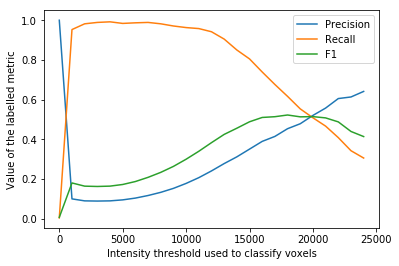

In [9]:
## Plots of F1 meaaures and threshold values:

plt.plot(threshold, precision)
plt.plot(threshold, recall)
plt.plot(threshold, f1)
plt.xlabel('Intensity threshold used to classify voxels')
plt.ylabel('Value of the labelled metric')

plt.legend(['Precision', 'Recall', 'F1'], loc='upper right')

plt.show()

### Generate overlays:



In [70]:
### Intensity threshold of 18000 gives one of the best F1
input_tif_path = 'sample.tif' 
output_csv_path = 'sample_out_intensity.csv'
detector = BlobDetector(input_tif_path, n_components = 3, threshold = 18000)
centroids = detector.get_blob_centroids()
util.write_list_to_csv(centroids, output_csv_path)

ground_truth_path = 'sample.csv'
ground_truth = util.get_list_from_csv(ground_truth_path)
metrics = BlobMetrics(ground_truth, centroids)
print('Precision: {}\nRecall: {}'.format(metrics.precision(), metrics.recall()))

Precision: 0.453
Recall: 0.616


In [71]:
def overlay_code(image,gt_ellipses, pred_ellipses, numb):
    fig, ax = plt.subplots(figsize = (20, 10))
    ax.set_title('Z-slice =' + str(numb) + ': Overlays for intensity threshold 18000', fontweight = 'bold')
    ax.imshow(image, cmap = mpl.cm.gray)
    plt.autoscale(False)


    for idx, row in gt_ellipses.iterrows():
        x = row['X']
        y = row['Y'] 
        elps_1 = mpl.patches.Ellipse((x, y), width = 6, height = 10, edgecolor = 'g', lw = 2, facecolor = 'none')
        ax.add_patch(elps_1)


    for idx, row in pred_ellipses.iterrows():
        x = row['X'] 
        y = row['Y'] 
        elps_2 = mpl.patches.Ellipse((x, y), width = 6, height = 10, edgecolor = 'r', lw = 2, facecolor = 'none')
        ax.add_patch(elps_2)

    red_patch = mpl.patches.Patch(color = 'red', label = 'Prediction, Z-slice =' + str(numb))
    green_patch = mpl.patches.Patch(color = 'green', label = 'Ground Truth, Z-slice =' + str(numb))
    plt.legend(handles = [red_patch, green_patch], bbox_to_anchor = (0, 0), loc = "upper left")

    scalebar = ScaleBar(0.09, 'um', length_fraction = 0.1, height_fraction = 0.005, color = 'k', border_pad = 0.5)
    ax.add_artist(scalebar)
    ax.axis('off')

    plt.show()

### Open tif file 

In [72]:
from scipy.ndimage import imread

In [73]:
from skimage.color import rgb2gray
import matplotlib as mpl
import matplotlib.pyplot as plt





from matplotlib_scalebar.scalebar import ScaleBar

In [74]:
im1 = imread('slice_8.png')
im2 = imread('slice_15.png')
im3 = imread('slice_10.png')

im1_final = rgb2gray(im1)
im2_final = rgb2gray(im2)
im3_final = rgb2gray(im3)

/Users/drishtimannan/anaconda3/envs/bloby2/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.
/Users/drishtimannan/anaconda3/envs/bloby2/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/Users/drishtimannan/anaconda3/envs/bloby2/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Import csv file as pandas dataframe 

In [77]:
g_tru = pd.read_csv('ground_truth.csv')

pred = pd.read_csv('sample_out_intensity.csv')


### From pandas dataframe, extract only z-slice of a certain value

In [78]:
gt_8_ellipse = g_tru[g_tru['Z'] == 7]

pred_8_ellipse = pred[pred['Z'] == 7]

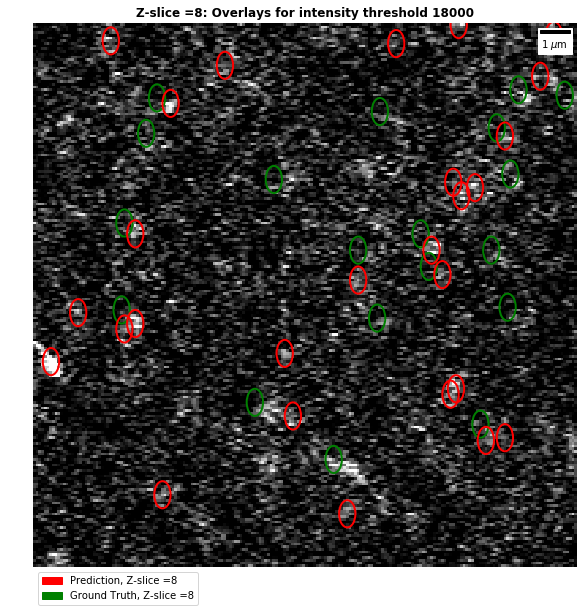

In [79]:
overlay_code(im1_final,gt_8_ellipse,pred_8_ellipse,8)

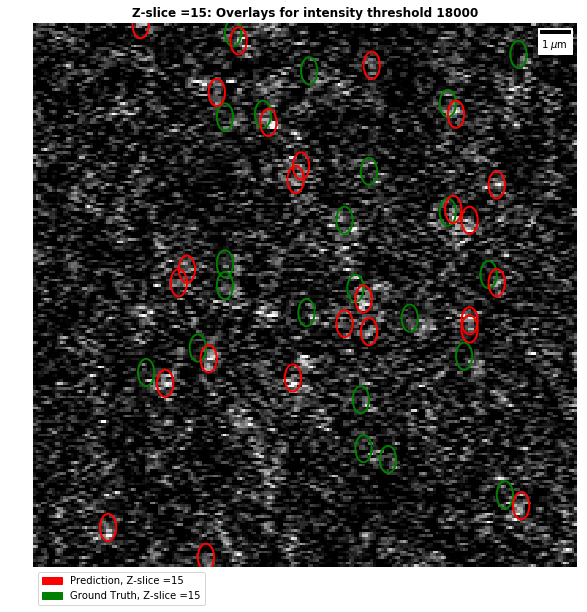

In [80]:
gt_15_ellipse = g_tru[g_tru['Z'] == 14]


pred_15_ellipse = pred[pred['Z'] == 14]

overlay_code(im2_final,gt_15_ellipse,pred_15_ellipse,15)

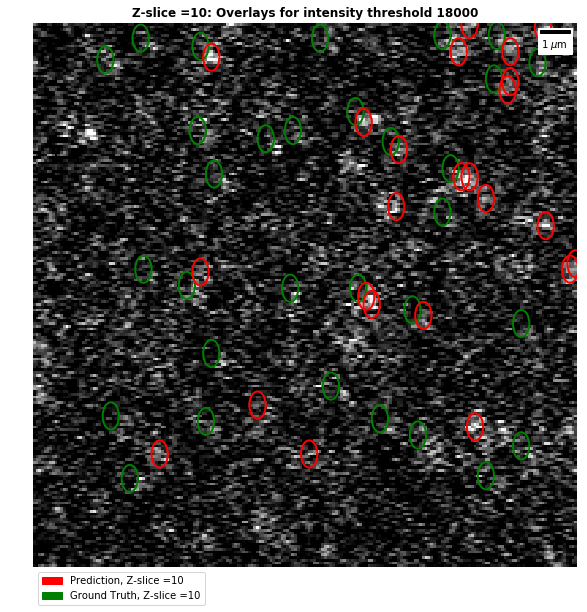

In [81]:
gt_10_ellipse = g_tru[g_tru['Z'] == 9]



pred_10_ellipse = pred[pred['Z'] == 9]


overlay_code(im3_final,gt_10_ellipse,pred_10_ellipse,10)